In [1]:
import pandas
import seaborn
import matplotlib.pyplot

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None

dirty_nba = pandas.read_csv("dirty_aba_nba_players.csv")

dirty_nba.head(40)

,Unnamed: 0,Player Name,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp Dbl,Unnamed: 18,Unnamed: 22,Unnamed: 23,Unnamed: 28,Unnamed: 29
0,0,Alaa Abdelnaby,1990-91,22.0,POR,NBA,PF,43.0,0.0,290.0,55.0,116.0,0.474,0.0,0.0,NaN,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alaa Abdelnaby,1991-92,23.0,POR,NBA,PF,71.0,1.0,934.0,178.0,361.0,0.493,0.0,0.0,NaN,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Alaa Abdelnaby,1992-93,24.0,TOT,NBA,PF,75.0,52.0,1311.0,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alaa Abdelnaby,1992-93,24.0,MIL,NBA,PF,12.0,0.0,159.0,26.0,56.0,0.464,0.0,1.0,0.0,26.0,55.0,0.473,0.464,12.0,16.0,0.750,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Alaa Abdelnaby,1992-93,24.0,BOS,NBA,PF,63.0,52.0,1152.0,219.0,417.0,0.525,0.0,0.0,NaN,219.0,417.0,0.525,0.525,76.0,100.0,0.760,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Alaa Abdelnaby,1993-94,25.0,BOS,NBA,PF,13.0,0.0,159.0,24.0,55.0,0.436,0.0,0.0,NaN,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Alaa Abdelnaby,1994-95,26.0,TOT,NBA,PF,54.0,0.0,506.0,118.0,231.0,0.511,0.0,2.0,0.0,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Alaa Abdelnaby,1994-95,26.0,SAC,NBA,PF,51.0,0.0,476.0,117.0,220.0,0.532,0.0,2.0,0.0,117.0,218.0,0.537,0.532,20.0,35.0,0.571,34.0,72.0,106.0,13.0,15.0,12.0,40.0,102.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Alaa Abdelnaby,1994-95,26.0,PHI,NBA,PF,3.0,0.0,30.0,1.0,11.0,0.091,0.0,0.0,NaN,1.0,11.0,0.091,0.091,0.0,0.0,NaN,3.0,5.0,8.0,0.0,0.0,0.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Alaa Abdelnaby,1990-91,22.0,POR,NBA,PF,5.0,0.0,13.0,2.0,6.0,0.333,0.0,0.0,NaN,2.0,6.0,0.333,0.333,0.0,0.0,NaN,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# sort seasons list to increase frames usability

seasons = list(dirty_nba["Season"].unique())
seasons.sort()
frames = []

for season in seasons:
    season_data = dirty_nba[ dirty_nba["Season"] == season]
    frames.append(season_data)
    
first_season = frames[0]
last_season = frames[-4]

ratios = []

# last_season
for _, row in last_season.iterrows():
    if row["TOV"] != 0:
        ratios.append(row["AST"] / row["TOV"])
    else:
        ratios.append(row["AST"] / 1)
    
last_season["RATIOS"] = ratios


/var/folders/sh/pvbf633j3jl4t_d94ms3t1_80000gn/T/ipykernel_94790/3810070797.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_season["RATIOS"] = ratios


In [3]:
'''What position is the most prolific with scoring in the NBA?

- seperate my data based on positions
- get total points for each position
- compare total points to find highest scoring position
'''

# find all positions in dataset
positions = dirty_nba['Pos'].dropna().unique()

pf = 0
c = 0
c_pf = 0
pg = 0 
sg = 0 
sf = 0 
sf_sg = 0
pg_sg = 0 
pf_sf = 0 
c_sf = 0 
pf_sg = 0 
pg_sf = 0 
pg_sf_sg = 0

for index, row in dirty_nba.iterrows():
    if row["Pos"] == "PF":
        pf += row['PTS']
    if row["Pos"] == "C":
        c += row['PTS']
    if row["Pos"] == "PG":
        pg += row['PTS']
    if row["Pos"] == "SG":
        sg += row['PTS']
    if row["Pos"] == "SF":
        sf += row['PTS']

pg, sg, sf, pf, c

(3011566.0, 3502449.0, 3267933.0, 3140619.0, 2747602.0)

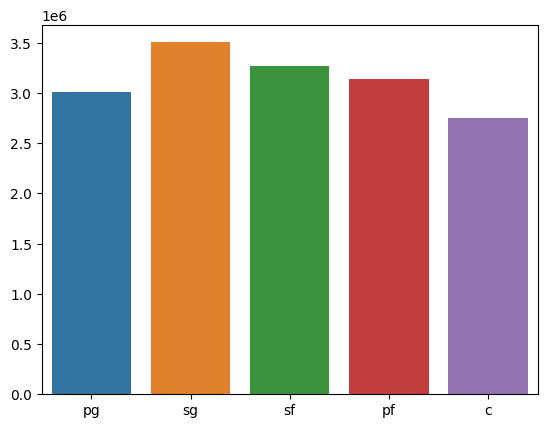

In [12]:
totals = {
    "pg": pg,
    "sg": sg,
    "sf": sf,
    "pf": pf,
    "c" : c,
}

df = pandas.DataFrame([totals])
seaborn.barplot(data=df)
matplotlib.pyplot.show()

# When trying to find what position scores the most points in the NBA, I totalled each positions points and compared these numbers. My findings show that four of the five positions considered (PG, SG, SF, and PF) scored over three million points total. However, shooting guards scored the most at 3,502,449.

In [ ]:
gender = ['male', 'female', 'male']

seaborn.countplot(x=gender)
matplotlib.pyplot.show()